# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [22]:

data = pd.read_csv(r'C:\Users\mareg\OneDrive\Documentos\TheBridge_Enero\Machine_Learning\2-No_Supervisado\1-PCA\Practica\data\comprar_alquilar.csv') 
data.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [24]:
data.shape

(202, 10)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

In [26]:
column_names = data.columns.tolist()
print(column_names)

['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar']


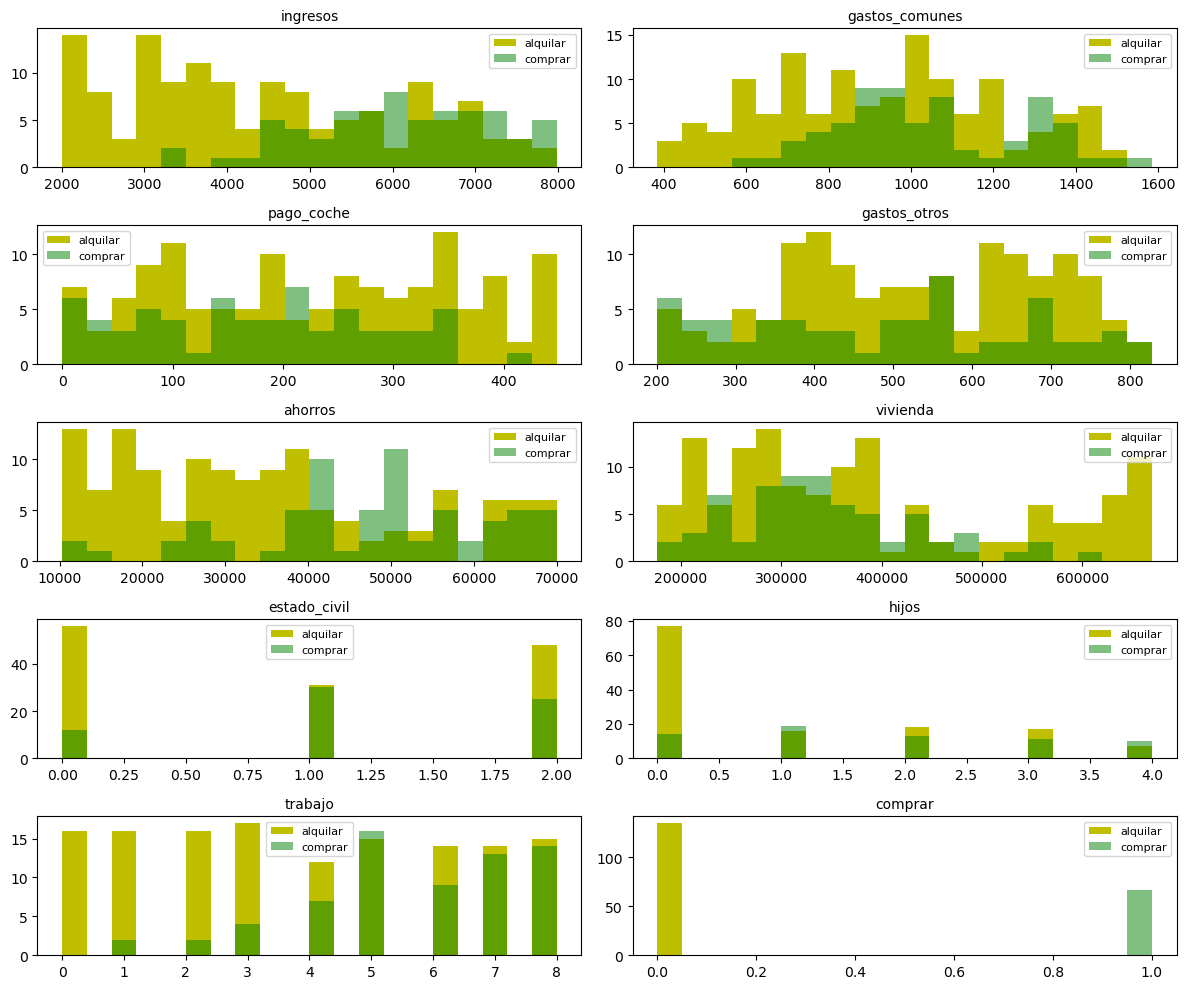

In [67]:
fig,axes =plt.subplots(5,2,figsize=(12, 10)) 
alquilar=data[data['comprar']==0] 
comprar=data[data['comprar']==1]
ax=axes.ravel()

for i in range(len(data.columns)):
  _,bins=np.histogram(data[data.columns[i]],bins=20)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='y')
  ax[i].hist(comprar.values[:,i],bins=bins,color='green',alpha=0.5)
  ax[i].set_title(data.columns[i],fontsize=10)
  ax[i].legend(['alquilar','comprar'],loc='best',fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\mareg\AppData\Local\Temp\ipykernel_32888\3204726247.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins=10)


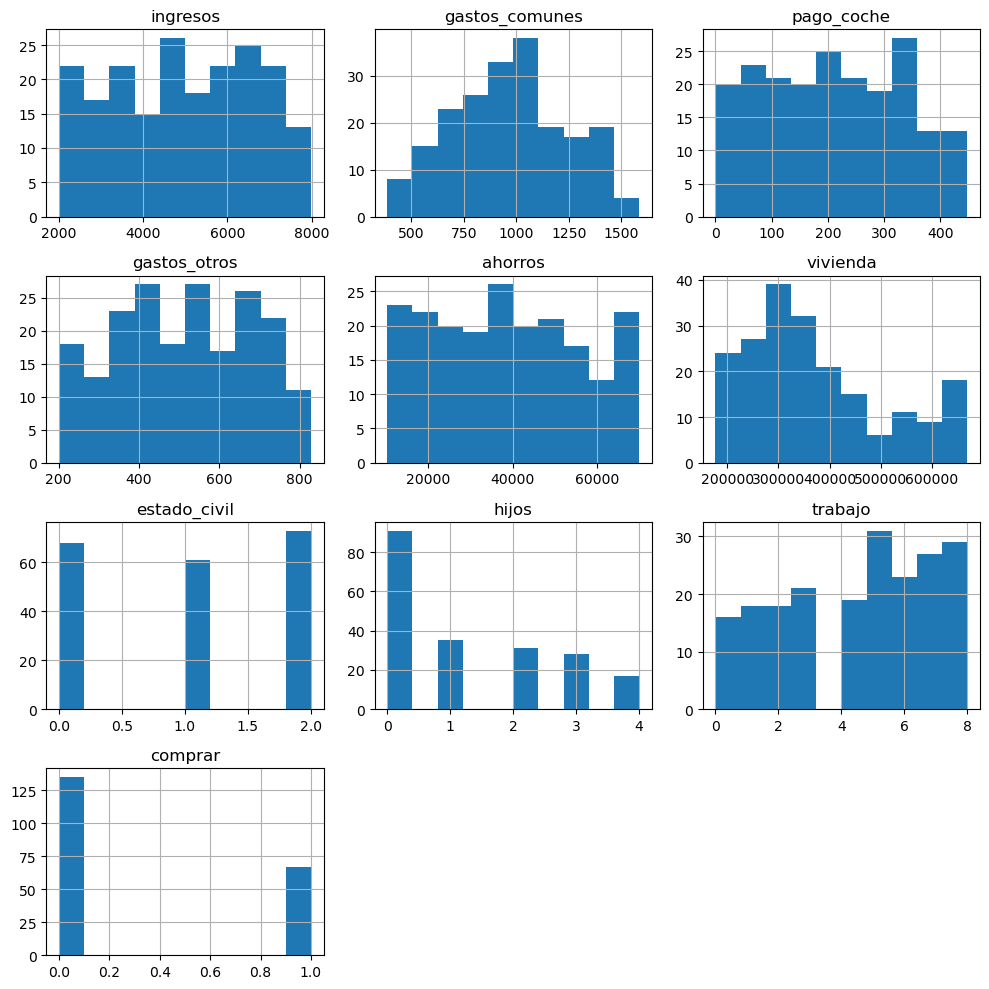

In [27]:
# Crear una figura con tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar las columnas en histogramas
data.hist(ax=ax, bins=10)  

# Personalizar los ejes y etiquetas
ax.set_xlabel('Valor')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Variables')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#normalizamos
scaler=StandardScaler()
df = data.drop(['comprar'], axis=1) 
scaler.fit(df) 
X_scaled=scaler.transform(df)#escalar los datos y normalizar



## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [8]:

pca=PCA(n_components=9) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) #  nuevas dimensiones de PCA

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [10]:
pca.explained_variance_ratio_

array([0.29913557, 0.23294923, 0.11711241, 0.10685622, 0.09635279,
       0.05629866, 0.04145579, 0.03017819, 0.01966115])

In [9]:

pca.components_

array([[-4.93720326e-01, -3.18228652e-01,  1.23770585e-01,
         1.11875722e-01, -4.44650306e-01, -4.62608605e-01,
         2.52278902e-01,  2.59858682e-01,  2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [ 9.14192492e-02,  3.63453156e-01,  5.16144106e-01,
        -7.01985912e-01, -1.91767355e-01, -1.40513292e-01,
         1.72884784e-01, -1.12183561e-01,  3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

In [11]:

var_expl = pca.explained_variance_ratio_
print(var_expl)
explained_variance_ratio_cumulative = np.cumsum(var_expl)
print(explained_variance_ratio_cumulative)
print('suma:',sum(var_expl[0:5])) # 5 componentes explican 85% de varianza 

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
[0.29913557 0.5320848  0.64919721 0.75605343 0.85240621 0.90870487
 0.95016066 0.98033885 1.        ]
suma: 0.8524062117714308


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

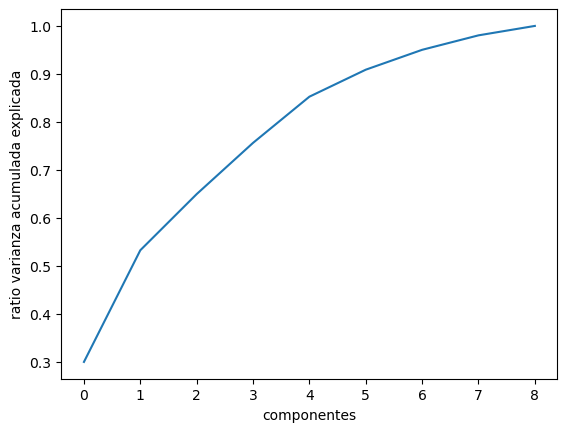

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('componentes')
plt.ylabel('ratio varianza acumulada explicada')
plt.show()
 

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

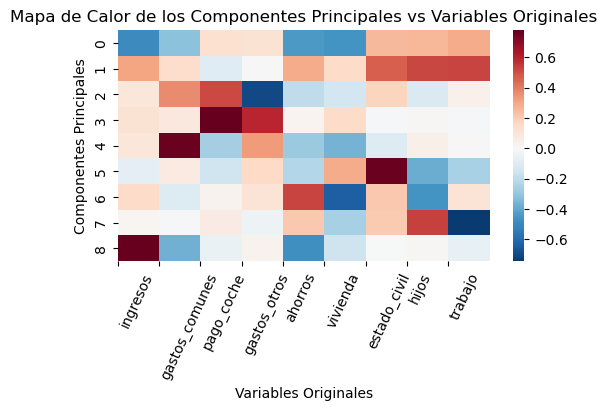

In [13]:
# Obtener los componentes principales del PCA
components = pca.components_

# Crear un mapa de calor de los componentes principales
plt.figure(figsize=(6, 3))
sns.heatmap(components, cmap='RdBu_r', center=0)
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.title('Mapa de Calor de los Componentes Principales vs Variables Originales')
plt.show()

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
from sklearn.pipeline import make_pipeline

In [29]:
X = data.drop('comprar', axis=1)
y = data['comprar']

In [30]:

# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Crear el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Escalador de características
    ('pca', PCA(n_components=5)),        # PCA con 5 componentes
    ('knn', KNeighborsClassifier(n_neighbors=3))   # KNN con 3 vecinos
])

# Paso 3: Ajuste del pipeline en los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Paso 4: Realizar predicciones en los datos de prueba
y_pred = pipeline.predict(X_test)

In [31]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Paso 5: Calcular el accuracy score en train y test
accuracy_train = accuracy_score(y_train, pipeline.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy en train:", accuracy_train)
print("Accuracy en test:", accuracy_test)


confusion_mat = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_mat)

Accuracy en train: 0.9130434782608695
Accuracy en test: 0.7560975609756098
Matriz de confusión:
[[21  3]
 [ 7 10]]


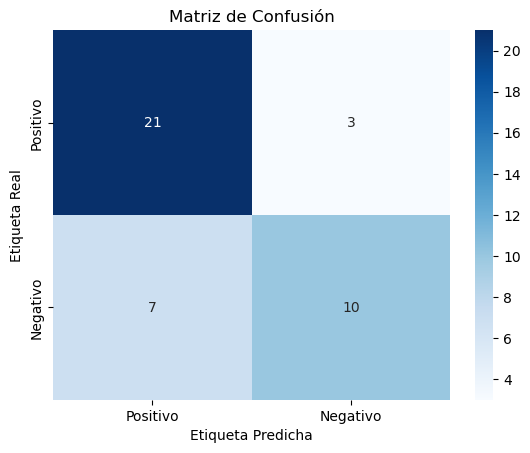

In [36]:
labels = ['Positivo','Negativo']  # Etiquetas de las clases
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

Mejorar el accuracy

In [37]:
best_accuracy = 0.0
best_neighbors = 0
best_components = 0

for n_neighbors in range(1, 10):
    for n_components in range(1, 10):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neighbors = n_neighbors
            best_components = n_components

print("Mejor combinación de vecinos y componentes:")
print("Vecinos:", best_neighbors)
print("Componentes:", best_components)
print("Accuracy en test:", best_accuracy)

Mejor combinación de vecinos y componentes:
Vecinos: 1
Componentes: 9
Accuracy en test: 0.8536585365853658


Guarda el modelo

In [38]:
import pickle


In [39]:
with open('modelo_entrenado.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Cargar el modelo
with open('modelo_entrenado.pkl', 'rb') as file:
    modelo_cargado = pickle.load(file)